In [17]:
# load the package
include("../FractionalFlow/FractionalFlow.jl")
using PyPlot, SetPyPlot, Dierckx, Statistics, NLopt
import Calculus
import GR
FF = FractionalFlow

Main.FractionalFlow

# Water-flooding

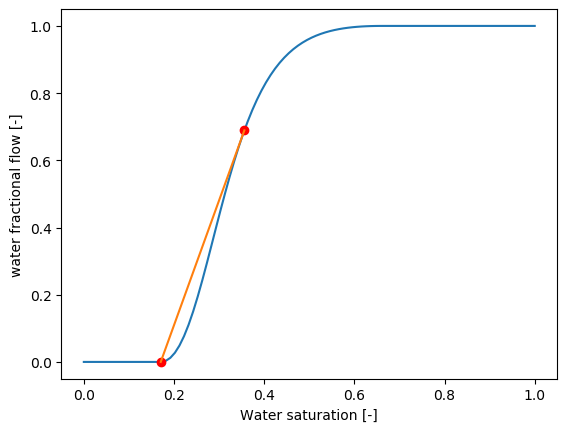

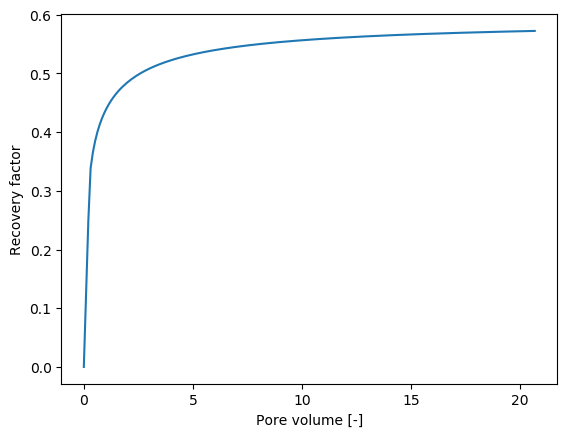

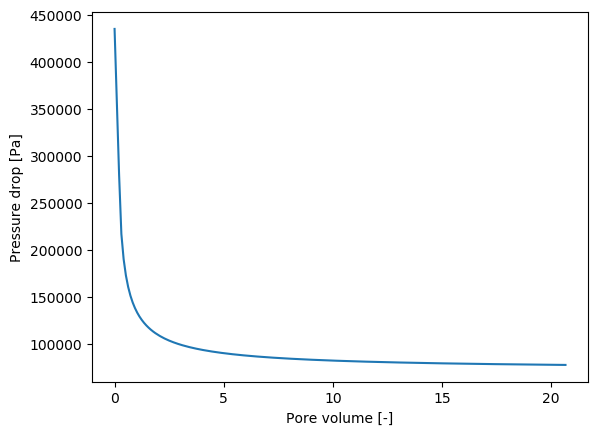

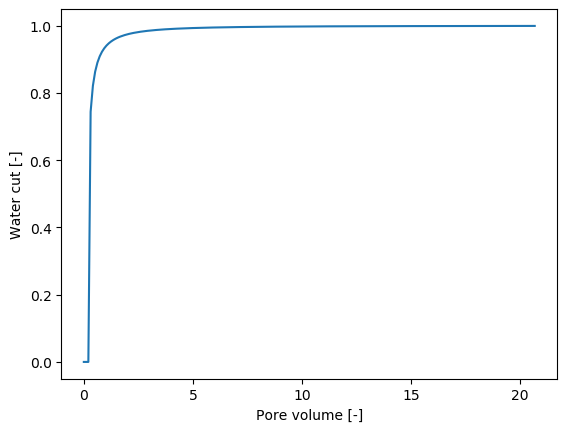

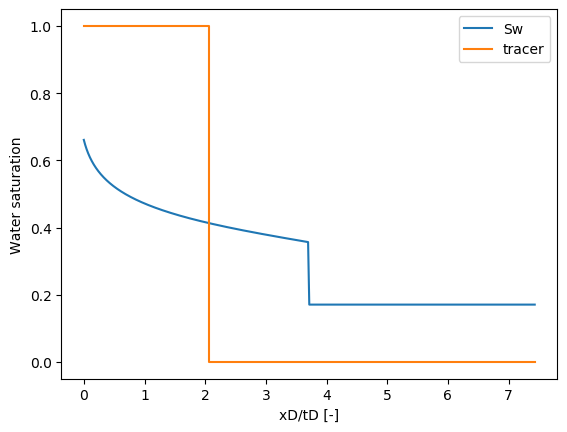

PyObject <matplotlib.legend.Legend object at 0x000000002948CD68>

In [18]:
# define the problem
# relative permeabilities
rel_perms = FF.oil_water_rel_perms(krw0=0.225543344, kro0=0.2335, 
    swc=0.170588235, sor=0.33917, nw=2.0, no = 2.0)
# FF.visualize(rel_perms)
# define the fluids
fluids = FF.oil_water_fluids(mu_water=0.4904e-3, mu_oil=3.039e-3)

# define the fractional flow functions
fw, dfw = FF.fractional_flow_function(rel_perms, fluids)
# visualize the fractional flow
# FF.visualize(rel_perms, fluids, label="lowsal")
# tight_layout()
core_flood = FF.core_flooding(u_inj=1.50E-06, pv_inject=20.666, 
    p_back=2.7579e+7, sw_init=0.170588235, sw_inj=1.0, rel_perms=rel_perms)
core_props = FF.core_properties(L=0.01079, D=0.03761, φ=0.4264, k=4.84E-16, a=2000, ρ=2700)
wf_res = FF.water_flood(core_props, fluids, rel_perms, core_flood)
fw, dfw = FF.fractional_flow_function(rel_perms, fluids)
sw_tmp = range(0,stop=1,length=100)

FF.visualize(wf_res)

In [11]:
t_sec, pv, rec_fact, dp_core, x, sw_face, c_face, c_out_sal=FF.water_flood_numeric(core_props, fluids, rel_perms, core_flood, Nx=50)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


([0.0, 14.386666666666665, 14.93657011887767, 15.511666258358815, 16.113899380575344, 16.745343720826227, 17.408213547486632, 18.104874154157663, 18.837853841966698, 19.609856993908195  …  22281.175248261403, 24584.322405552895, 27232.236026094277, 30299.791772093664, 33884.18185574817, 38113.585058073, 43160.08091780182, 49259.37153602065, 56741.74947351928, 63387.526730666665], [0.0, 0.004690431519699812, 0.004869714500587827, 0.005057210959773187, 0.005253554788687805, 0.005459422242565154, 0.005675535231102637, 0.005902664902191353, 0.006141635548460993, 0.006393328869858631  …  7.264248842474554, 8.015135359230836, 8.878424805979892, 9.878528616879228, 11.047134008024214, 12.426030631497595, 14.07132094042994, 16.059850015742935, 18.499301914747807, 20.666], [0.0, 0.005655130198975013, 0.005871286984367538, 0.006097346545009635, 0.006334073147163502, 0.006582282134019333, 0.006842843893157121, 0.007116688177354159, 0.007404808814597457, 0.007708268847380931  …  0.541910479171103, 

# synthetic experimental data


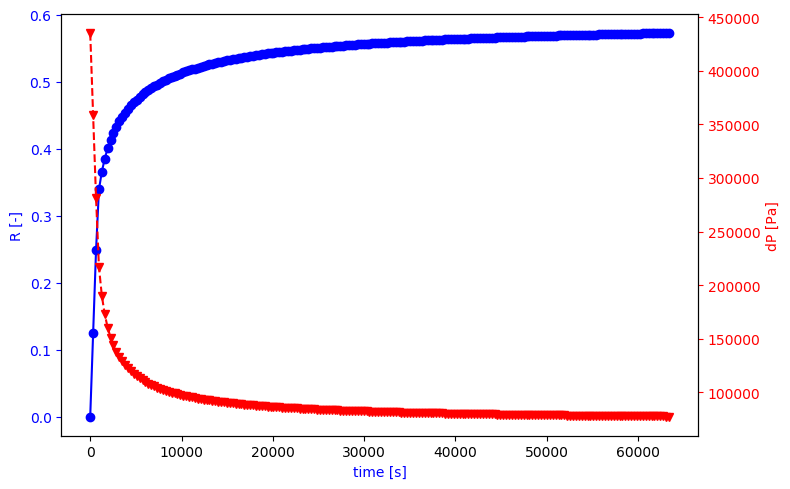

(Figure(PyObject <Figure size 800x500 with 2 Axes>), PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x000000003348F5F8>, PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x000000003662D048>)

In [12]:
t_exp_dp = wf_res.dp_time[:,1]
dp_exp = wf_res.dp_time[:,2]
t_exp_R = wf_res.recovery_time[:,1]
R_exp = wf_res.recovery_time[:,2]
plotyy(t_exp_R, R_exp, t_exp_dp, dp_exp, fig_size = [8,5], x_label="time [s]", y1_label="R [-]", y2_label="dP [Pa]")

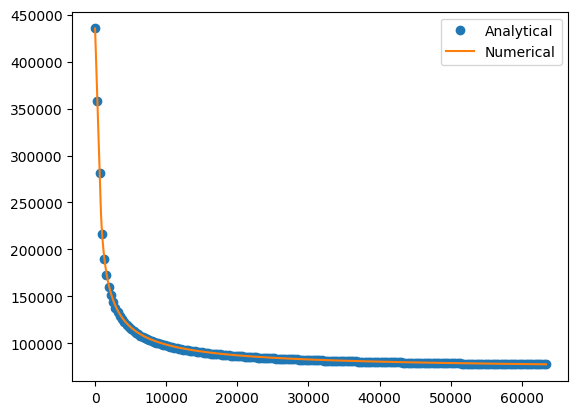

PyObject <matplotlib.legend.Legend object at 0x0000000029557D30>

In [19]:
plot(t_exp_dp, dp_exp, "o", t_sec, dp_core)
legend(["Analytical", "Numerical"])

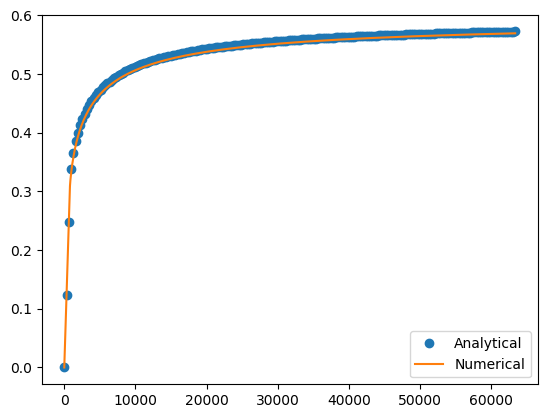

PyObject <matplotlib.legend.Legend object at 0x0000000029391160>

In [20]:
plot(t_exp_dp, R_exp, "o", t_sec, rec_fact)
legend(["Analytical", "Numerical"])